In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
print(data.shape)
print(data.head())

(20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [4]:
data = data.dropna()

In [5]:
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

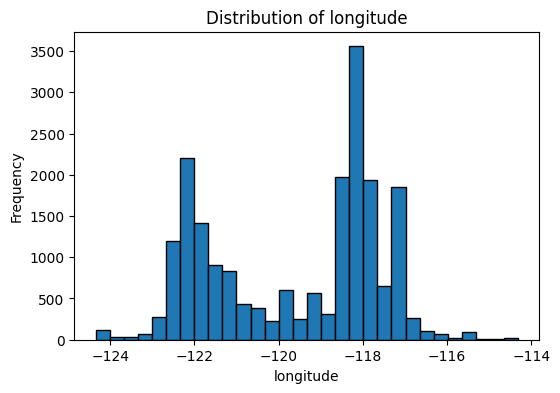

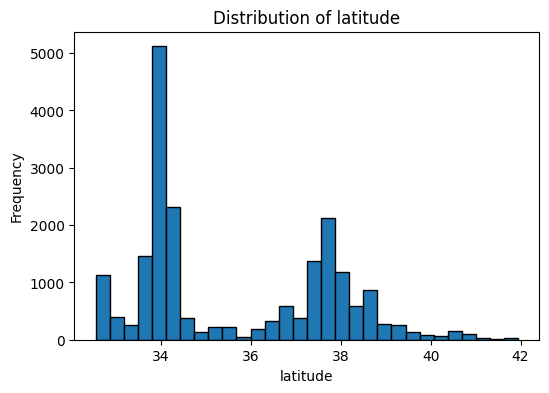

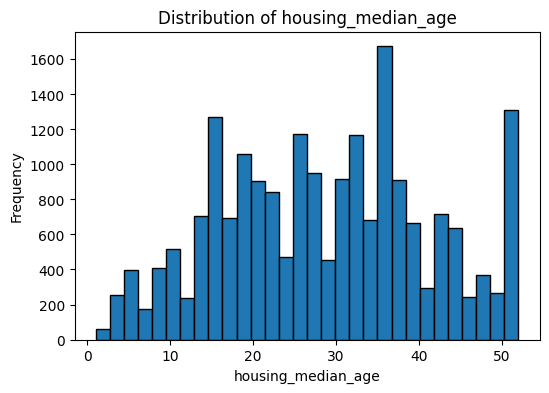

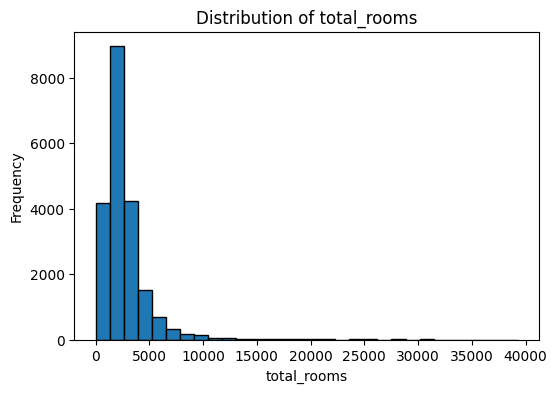

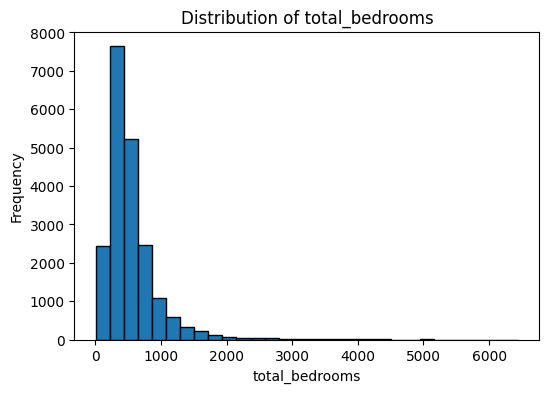

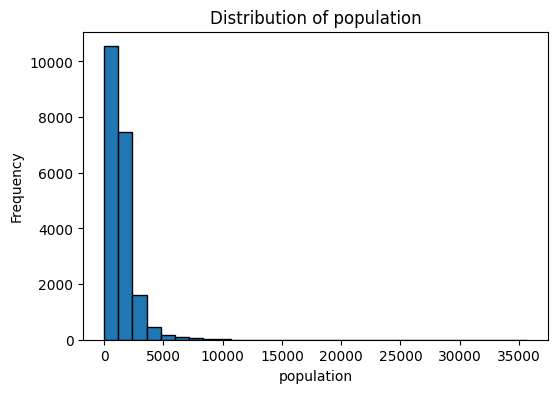

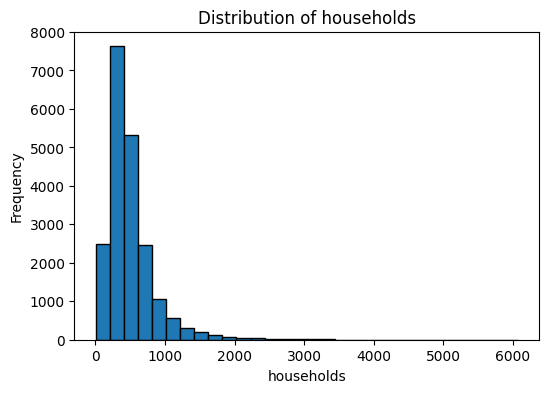

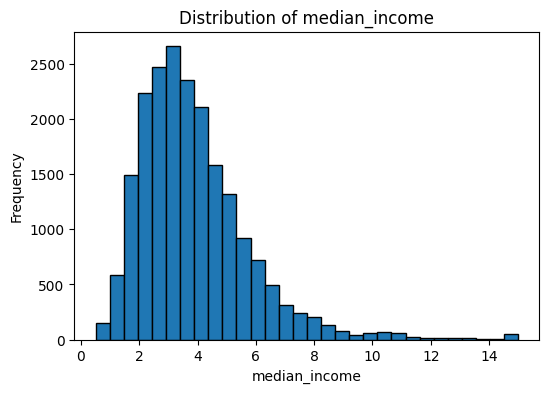

In [6]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']
for col in numeric_cols:
    if col in data.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(data[col], bins=30, edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

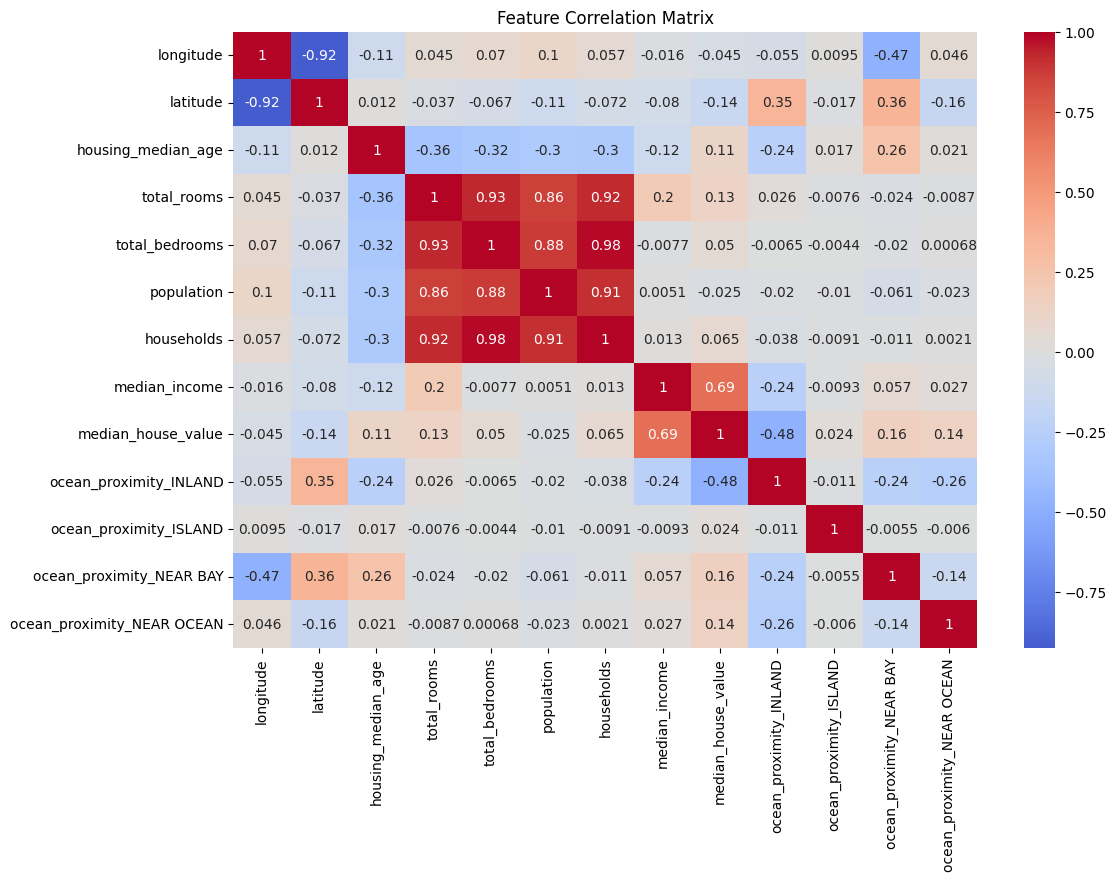

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [8]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (16346, 12)
Test set: (4087, 12)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 69297.7166911303
R² Score: 0.6488402154431994


In [11]:
coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
coefficients = coefficients.sort_values('coefficient', ascending=False)
print(coefficients)

                       feature    coefficient
9       ocean_proximity_ISLAND  213653.374463
7                median_income   39277.083020
11  ocean_proximity_NEAR OCEAN    3166.477128
2           housing_median_age    1081.364206
4               total_bedrooms     103.004042
6                   households      43.142725
3                  total_rooms      -6.322146
5                   population     -36.409751
10    ocean_proximity_NEAR BAY   -6232.416876
1                     latitude  -25657.807543
0                    longitude  -27108.746321
8       ocean_proximity_INLAND  -39240.217778


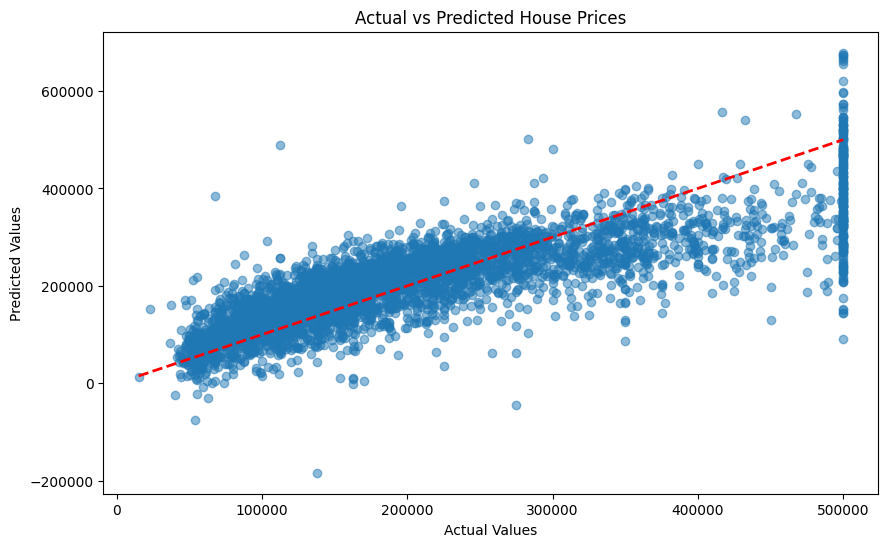

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.show()

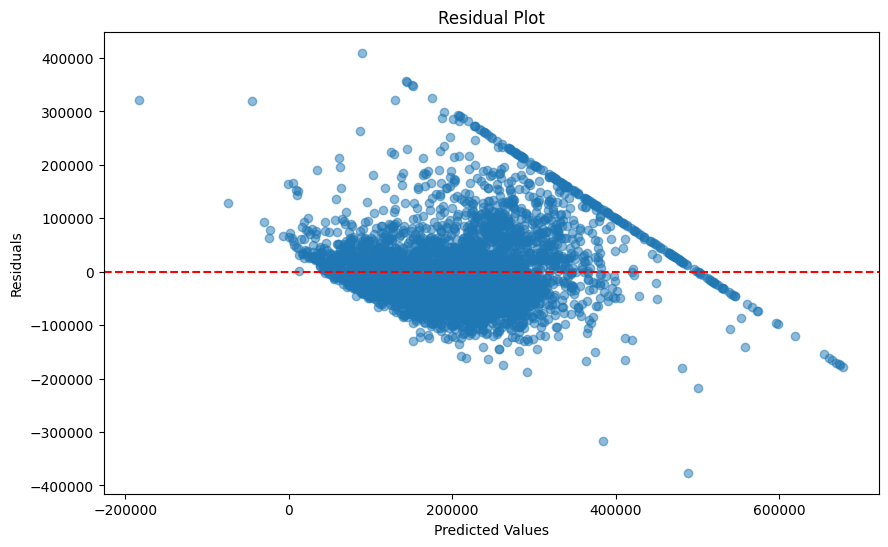

In [13]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [14]:
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [15]:
sample_house = X_test.iloc[0:1]
predicted_price = model.predict(sample_house)[0]
actual_price = y_test.iloc[0]
print(f"Sample House Features:\n{sample_house}")
print(f"Predicted Price: ${predicted_price:,.2f}")
print(f"Actual Price: ${actual_price:,.2f}")
print(f"Difference: ${abs(predicted_price - actual_price):,.2f}")

Sample House Features:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416    -117.24     32.79                20.0        961.0           278.0   

       population  households  median_income  ocean_proximity_INLAND  \
14416       525.0       254.0         3.1838                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
14416                   False                     False   

       ocean_proximity_NEAR OCEAN  
14416                        True  
Predicted Price: $201,882.96
Actual Price: $245,800.00
Difference: $43,917.04


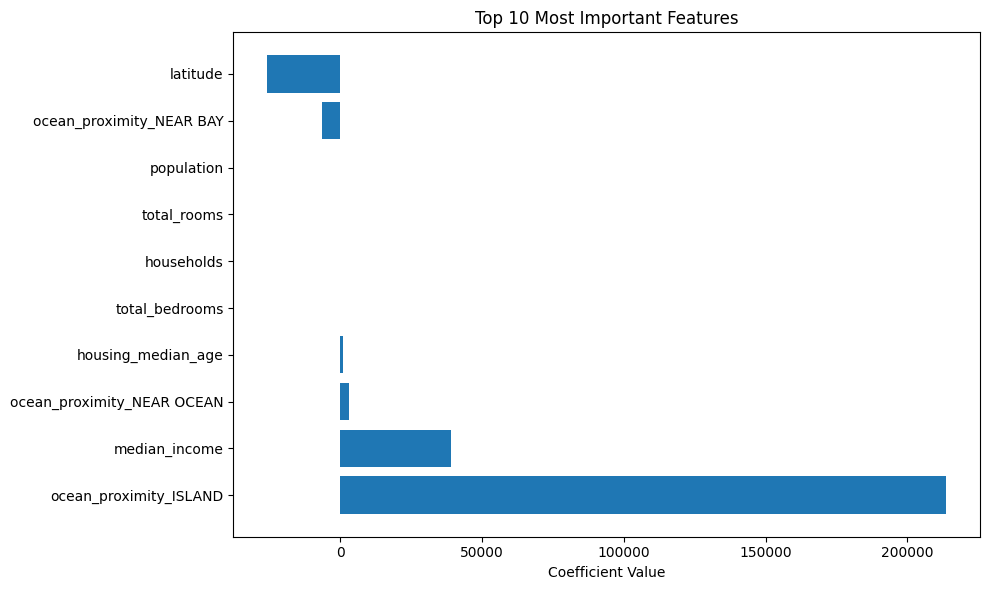

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(coefficients['feature'][:10], coefficients['coefficient'][:10])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()